In [1]:
#Tidyverse for general ease of use
install.packages("tidyverse") 

#janitor to clean data
install.packages("janitor")

#lubridate to correct dates to singular format
install.packages("lubridate")

#scales formats x and y for ggplot
install.packages("scales")


#load librarys
library(tidyverse)
library(janitor)
library(lubridate)
library(scales)

#directory based on what month the data is 
Jan22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Jan22.csv")
Feb22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Feb22.csv")
Mar22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Mar22.csv")
Apr22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Apr22.csv")
May22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/May22.csv")
Jun22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Jun22.csv")
Jul22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Jul22.csv")
Aug22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Aug22.csv")
Sep22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Sep22.csv")
Oct22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Oct22.csv")
Nov22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Nov22.csv")
Dec22 <- read.csv("/kaggle/input/2022-bike-data-for-capstone/Dec22.csv")

#Combine the data into 1 data 
bike_rides <- rbind(Jan22, Feb22, Mar22, Apr22, May22, Jun22, Jul22, Aug22, Sep22, Oct22, Nov22, Dec22)
#dim check
dim(bike_rides)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scale

[1] 5667717      13

In [2]:
# Convert started_at and ended_at columns to datetime objects
bike_rides$started_at <- ymd_hms(bike_rides$started_at)
bike_rides$ended_at <- ymd_hms(bike_rides$ended_at)

# Extract start_time and end_time as time objects (hms)
bike_rides$start_time <- format(bike_rides$started_at, format = "%H:%M:%S")
bike_rides$end_time <- format(bike_rides$ended_at, format = "%H:%M:%S")

# Extract start_hour and end_hour as numeric (hour of the day)
bike_rides$start_hour <- hour(bike_rides$started_at)
bike_rides$end_hour <- hour(bike_rides$ended_at)

#Extract month
bike_rides$started_at <- ymd_hms(bike_rides$started_at)
bike_rides$month_value <- month(bike_rides$started_at)

#ride_length
bike_rides$start_time <- hms(bike_rides$start_time)
bike_rides$end_time <- hms(bike_rides$end_time)
bike_rides$ride_length <- as.numeric(bike_rides$end_time - bike_rides$start_time) / 60

#rename 'member_casual'
bike_rides <- bike_rides %>%
  rename(rider_type = member_casual)

#Remove lat/lng
bike_rides <- bike_rides %>%
  select(-start_lat, -start_lng, -end_lat, -end_lng)

#Remove 0, NA, Null
bike_rides <- bike_rides %>%
  filter_all(all_vars(!is.na(.))) %>%
  filter_all(all_vars(!is.null(.))) %>%
  filter_all(all_vars(. != 0))

Warning message:
“ 1168855 failed to parse.”
Warning message:
“ 1168855 failed to parse.”
Warning message in .parse_hms(..., order = "HMS", quiet = quiet):
“Some strings failed to parse, or all strings are NAs”
Warning message in .parse_hms(..., order = "HMS", quiet = quiet):
“Some strings failed to parse, or all strings are NAs”


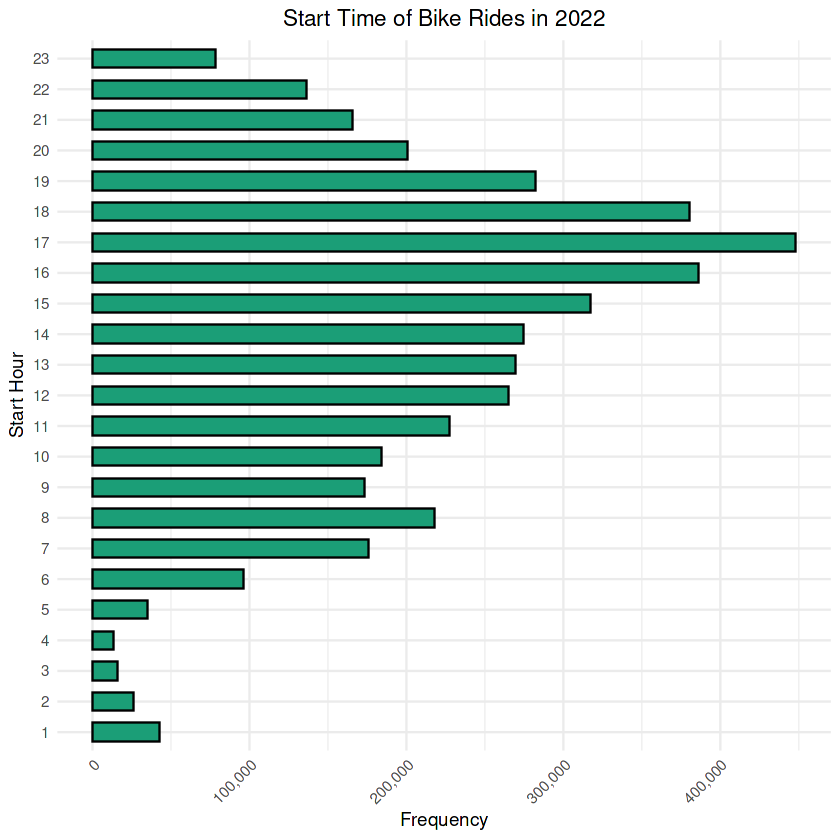

In [3]:
# Y-axis = hour, x-axis = Frequency 
bike_rides_counts <- bike_rides %>% count(start_hour, sort = TRUE)

ggplot(data = bike_rides_counts, aes(x = factor(start_hour), y = n)) +
  geom_bar(fill = "#1b9e77", color = "black", width = 0.6, stat = "identity") +  
  scale_y_continuous(labels = comma) +
  labs(x = "Start Hour", y = "Frequency", title = "Start Time of Bike Rides in 2022") +
  theme_minimal() +  
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, hjust = 1)) +  
  coord_flip()  # Flip the x and y axes for a horizontal bar plot


`summarise()` has grouped output by 'rider_type'. You can override using the
`.groups` argument.


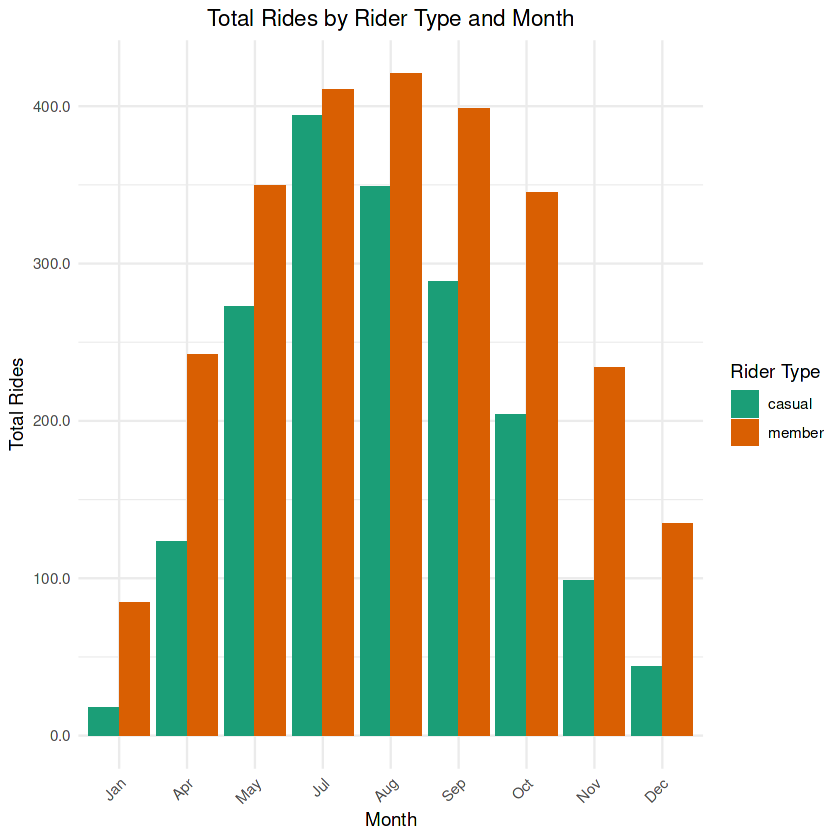

In [4]:

#Rides by Month, Rider Type
rides_by_month_rider <- bike_rides %>%
  group_by(rider_type, month_value) %>%
  summarize(total_rides = n())

#Total rides by type and month
ggplot(rides_by_month_rider, aes(x = factor(month_value), y = total_rides, fill = rider_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Month", y = "Total Rides", title = "Total Rides by Rider Type and Month") +
  scale_fill_manual(values = c("#1b9e77", "#d95f02"), name = "Rider Type") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(breaks = 1:12, labels = month.abb)+
  scale_y_continuous(labels = label_number(scale = 1e-3, accuracy = 0.1))



`summarise()` has grouped output by 'rider_type'. You can override using the
`.groups` argument.


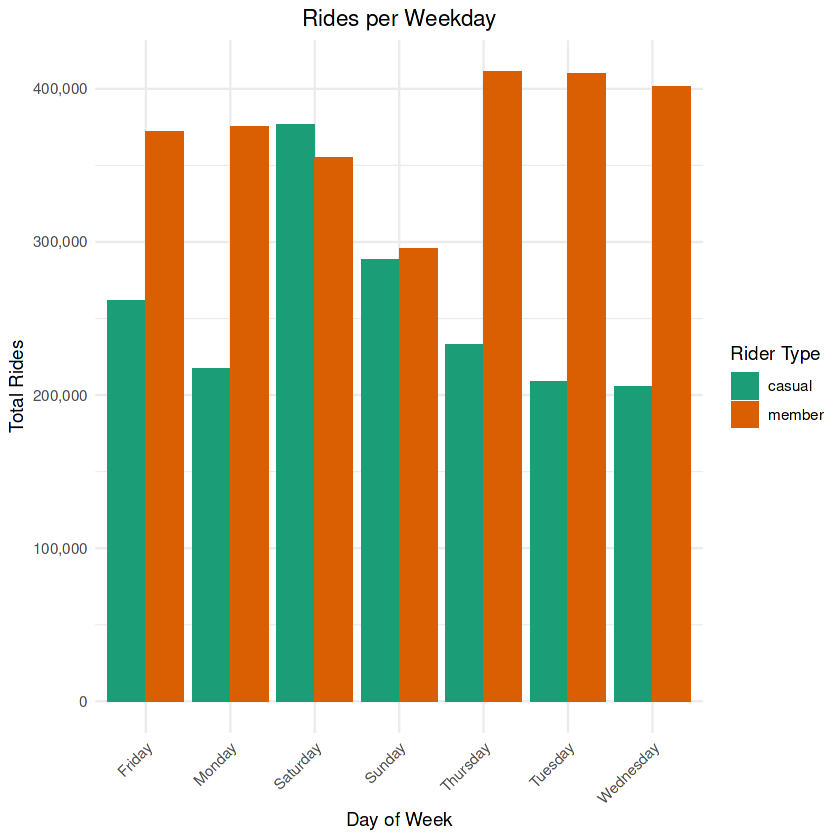

In [5]:
#rename start_at and end_at to start_date and end_date
names(bike_rides)[names(bike_rides) == "started_at"] <- "start_date"
names(bike_rides)[names(bike_rides) == "ended_at"] <- "end_date"

#create day_of_week
bike_rides$start_date <- ymd_hms(bike_rides$start_date)
bike_rides$day_of_week <- weekdays(bike_rides$start_date)

rides_by_day_rider <- bike_rides %>%
  group_by(rider_type, day_of_week) %>%
  summarize(total_rides = n())

#Ride per Weekday grouped by Rider type
ggplot(rides_by_day_rider, aes(x = day_of_week, y = total_rides, fill = rider_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Day of Week", y = "Total Rides", title = "Rides per Weekday") +
  scale_fill_manual(values = c("#1b9e77", "#d95f02"), name = "Rider Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(labels = scales::comma_format())

`summarise()` has grouped output by 'rider_type'. You can override using the
`.groups` argument.


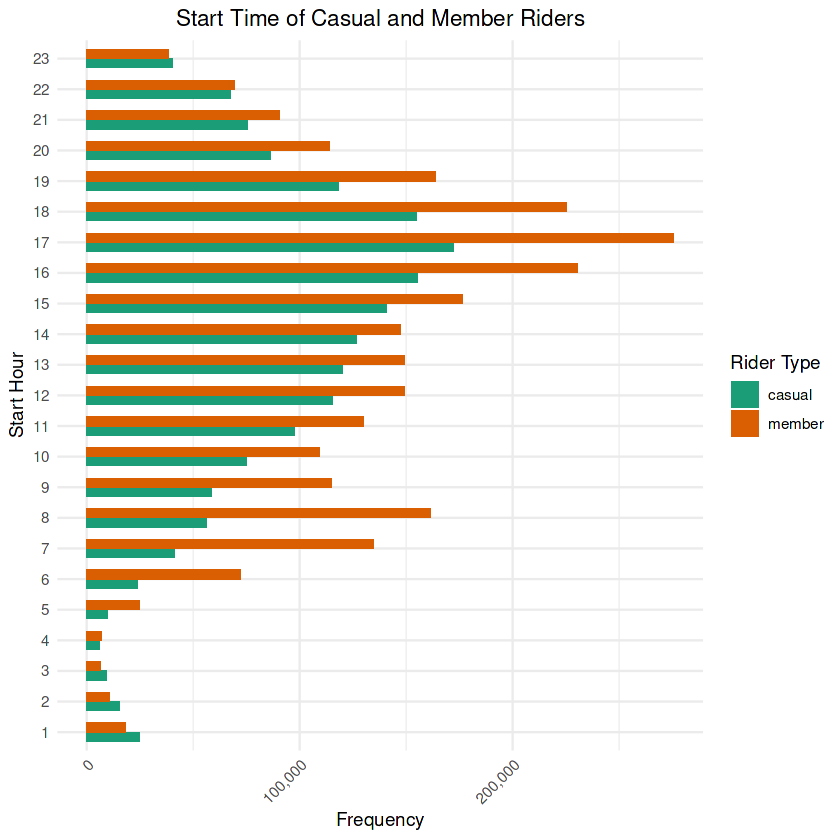

In [6]:
#Hourly Rides by Type of Rider
rides_by_hour_rider <- bike_rides %>%
  group_by(rider_type, start_hour) %>%
  summarize(n = n())

ggplot(data = rides_by_hour_rider, aes(x = factor(start_hour), y = n, fill = rider_type)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.6) +
  scale_y_continuous(labels = scales::comma_format()) +
  labs(x = "Start Hour", y = "Frequency", title = "Start Time of Casual and Member Riders") +
  scale_fill_manual(values = c("#1b9e77", "#d95f02"), name = "Rider Type") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

In [7]:
# Filter data to keep only the stations used by both rider types and remove stations with either member or casual rides = 0
common_start_stations <- bike_rides %>%
  group_by(start_station_name) %>%
  filter(all(c("casual", "member") %in% rider_type) & sum(rider_type == "casual") > 0 & sum(rider_type == "member") > 0) %>%
  ungroup()

# Group the filtered data by 'rider_type' and 'start_station_name', and calculate the counts
start_station_counts <- common_start_stations %>%
  group_by(rider_type, start_station_name) %>%
  summarize(counts = n()) %>%
  arrange(rider_type, desc(counts))

# Get the top 8 start stations for each rider type
top_8_member_stations <- start_station_counts %>%
  filter(rider_type == "member") %>%
  top_n(8, counts) %>%
  ungroup()

top_8_casual_stations <- start_station_counts %>%
  filter(rider_type == "casual") %>%
  top_n(8, counts) %>%
  ungroup()

# Convert counts to numeric for proper scaling on the y-axis
top_8_member_stations$counts <- as.numeric(top_8_member_stations$counts)
top_8_casual_stations$counts <- as.numeric(top_8_casual_stations$counts)

# Create separate bar charts for member and casual riders
plot_member <- ggplot(top_8_member_stations, aes(x = reorder(start_station_name, counts), y = counts)) +
  geom_bar(stat = "identity", fill = "#1b9e77", color = "black") +
  labs(x = "Station Name", y = "Number of Rides", title = "Top 8 Starting Stations for Member Riders") +
  scale_y_continuous(labels = comma) +  # Format y-axis labels with commas
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5))

`summarise()` has grouped output by 'rider_type'. You can override using the
`.groups` argument.


In [8]:
plot_casual <- ggplot(top_8_casual_stations, aes(x = reorder(start_station_name, counts), y = counts)) +
  geom_bar(stat = "identity", fill = "#d95f02", color = "black") +
  labs(x = "Station Name", y = "Number of Rides", title = "Top 8 Starting Stations for Casual Riders") +
  scale_y_continuous(labels = comma) +  # Format y-axis labels with commas
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5))


`summarise()` has grouped output by 'rider_type'. You can override using the
`.groups` argument.


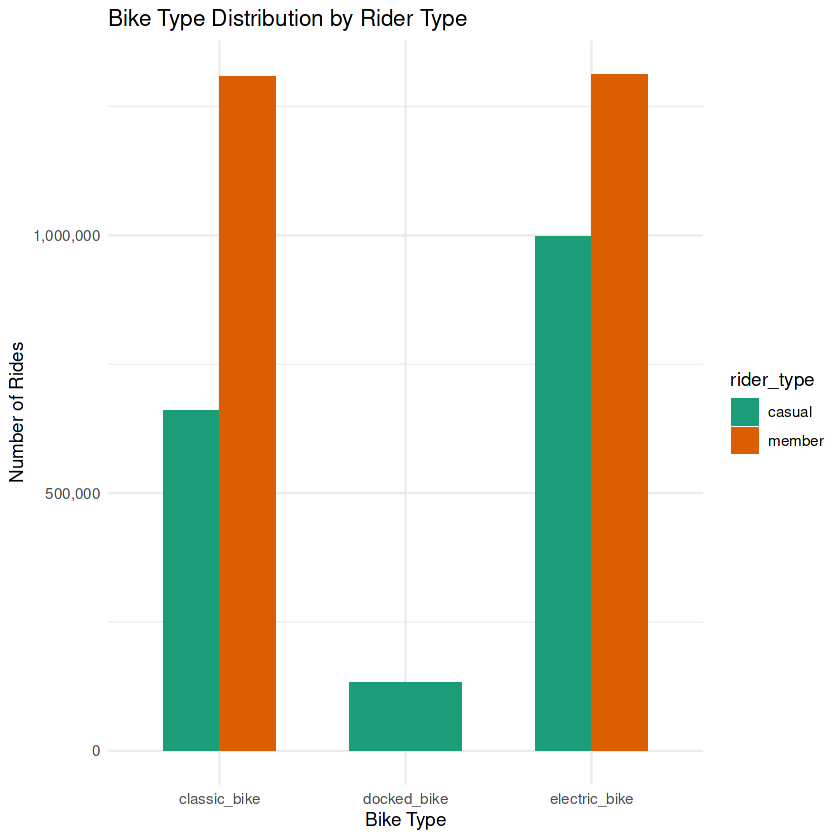

In [9]:
bike_rides <- bike_rides %>%
  rename(bike_type = rideable_type)

# Group the data by 'rider_type' and 'bike_type', and calculate the counts
bike_type_counts <- bike_rides %>%
  group_by(rider_type, bike_type) %>%
  summarize(counts = n()) %>%
  arrange(rider_type, desc(counts))

# Convert counts to numeric for proper scaling on the y-axis
bike_type_counts$counts <- as.numeric(bike_type_counts$counts)

# Create the bar chart
ggplot(bike_type_counts, aes(x = bike_type, y = counts, fill = rider_type)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.6) +
  labs(x = "Bike Type", y = "Number of Rides", title = "Bike Type Distribution by Rider Type") +
  scale_y_continuous(labels = scales::comma) +  # Format y-axis labels with commas
  scale_fill_manual(values = c("#1b9e77", "#d95f02")) +  
  theme_minimal()
